# Análise do COVID-19 em MG (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("https://raw.githubusercontent.com/elhenrico/covid19-Brazil-timeseries/master/confirmed-cases.csv").fillna(0)
df.rename({"Unnamed: 0": "Estado", "Unnamed: 1": "Sigla"}, axis='columns', inplace=True)
df.head(10)

,Estado,Sigla,26/2,27/2,28/2,29/2,1/3,2/3,3/3,4/3,...,3/4,4/4,5/4,6/4,7/4,8/4,9/4,10/4,11/4,12/4
0,Brasil,BR,1,1,1,2,2,2,2,3,...,9056,10278,11130,12056,13717,15927,17857,19638,20727,22169
1,Acre,AC,0,0,0,0,0,0,0,0,...,46,46,48,50,50,54,62,70,72,77
2,Amapá,AP,0,0,0,0,0,0,0,0,...,19,28,29,34,48,107,128,166,193,230
3,Amazonas,AM,0,0,0,0,0,0,0,0,...,260,311,417,532,636,804,899,981,1050,1206
4,Pará,PA,0,0,0,0,0,0,0,0,...,50,80,86,102,138,167,168,170,217,246
5,Rondônia,RO,0,0,0,0,0,0,0,0,...,10,11,12,14,18,18,28,32,33,35
6,Roraima,RR,0,0,0,0,0,0,0,0,...,30,37,42,42,42,49,52,63,75,79
7,Tocantins,TO,0,0,0,0,0,0,0,0,...,12,14,17,17,19,23,23,23,23,25
8,Norte,(N),0,0,0,0,0,0,0,0,...,427,527,651,791,951,1222,1360,1505,1663,1898
9,Alagoas,AL,0,0,0,0,0,0,0,0,...,22,23,28,31,32,37,37,45,48,48


## 2. Total de casos diários no Brasil (ordenação decrescente)

In [2]:
df = df[df.Estado != 'Sudeste']
df = df[df.Estado != 'Nordeste']
df = df[df.Estado != 'Centro-Oeste']
df = df[df.Estado != 'Sul']
df = df[df.Estado != 'Norte']
df = df[df.Estado != 'Brasil']

confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf["Casos Confirmados"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = confirmedCasesDf.sort_values(by=['Casos Confirmados'], ascending = False)
sortedConfirmedCasesGroupedDf.head(10)

,Estado,Sigla,26/2,27/2,28/2,29/2,1/3,2/3,3/3,4/3,...,4/4,5/4,6/4,7/4,8/4,9/4,10/4,11/4,12/4,Casos Confirmados
22,São Paulo,SP,1,1,1,2,2,2,2,3,...,4466,4620,4866,5682,6708,7480,8216,8419,8755,8755
21,Rio de Janeiro,RJ,0,0,0,0,0,0,0,0,...,1246,1394,1461,1688,1938,2216,2464,2607,2855,2855
11,Ceará,CE,0,0,0,0,0,0,0,0,...,730,823,1013,1051,1291,1425,1478,1582,1676,1676
3,Amazonas,AM,0,0,0,0,0,0,0,0,...,311,417,532,636,804,899,981,1050,1206,1206
14,Pernambuco,PE,0,0,0,0,0,0,0,0,...,176,201,223,352,401,555,684,816,960,960
20,Minas Gerais,MG,0,0,0,0,0,0,0,0,...,430,498,525,559,614,655,698,750,806,806
26,Santa Catarina,SC,0,0,0,0,0,0,0,0,...,334,357,379,417,457,501,693,732,768,768
24,Paraná,PR,0,0,0,0,0,0,0,0,...,395,438,458,503,539,609,643,676,738,738
10,Bahia,BA,0,0,0,0,0,0,0,0,...,332,401,431,456,497,559,604,635,673,673
25,Rio Grande do Sul,RS,0,0,0,0,0,0,0,0,...,410,418,481,508,555,618,636,640,653,653


### 2.1 Total de casos diários somente em SP

In [3]:
confirmedCasesByDayMGDf = confirmedCasesDf[confirmedCasesDf.Estado == 'Minas Gerais']
confirmedCasesByDayMGDf

,Estado,Sigla,26/2,27/2,28/2,29/2,1/3,2/3,3/3,4/3,...,4/4,5/4,6/4,7/4,8/4,9/4,10/4,11/4,12/4,Casos Confirmados
20,Minas Gerais,MG,0,0,0,0,0,0,0,0,...,430,498,525,559,614,655,698,750,806,806


In [4]:
confirmedCasesByDayMGCleanDf = confirmedCasesByDayMGDf.drop(["Estado", "Sigla", "Casos Confirmados"], axis=1)
datesMG = list(confirmedCasesByDayMGCleanDf)

i = 0
for d in datesMG:
    day, month = d.split("/")
    datesMG[i] = month + "/" + day + '/20'
    i = i + 1

infectedMG = confirmedCasesByDayMGCleanDf.iloc[0]

dfForPlotMG = pd.DataFrame(
    {'datas': datesMG, 'infectados': infectedMG})
dfForPlotMG['datas'] = pd.to_datetime(dfForPlotMG['datas'])
dfForPlotMG['datas']

26/2   2020-02-26
27/2   2020-02-27
28/2   2020-02-28
29/2   2020-02-29
1/3    2020-03-01
2/3    2020-03-02
3/3    2020-03-03
4/3    2020-03-04
5/3    2020-03-05
6/3    2020-03-06
7/3    2020-03-07
8/3    2020-03-08
9/3    2020-03-09
10/3   2020-03-10
11/3   2020-03-11
12/3   2020-03-12
13/3   2020-03-13
14/3   2020-03-14
15/3   2020-03-15
16/3   2020-03-16
17/3   2020-03-17
18/3   2020-03-18
19/3   2020-03-19
20/3   2020-03-20
21/3   2020-03-21
22/3   2020-03-22
23/3   2020-03-23
24/3   2020-03-24
25/3   2020-03-25
26/3   2020-03-26
27/3   2020-03-27
28/3   2020-03-28
29/3   2020-03-29
30/3   2020-03-30
31/3   2020-03-31
1/4    2020-04-01
2/4    2020-04-02
3/4    2020-04-03
4/4    2020-04-04
5/4    2020-04-05
6/4    2020-04-06
7/4    2020-04-07
8/4    2020-04-08
9/4    2020-04-09
10/4   2020-04-10
11/4   2020-04-11
12/4   2020-04-12
Name: datas, dtype: datetime64[ns]

(0.0, 1.0)

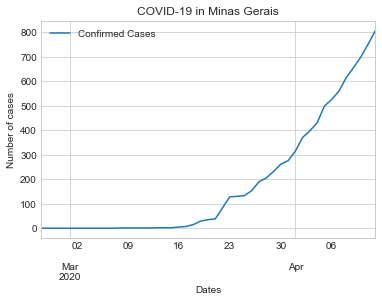

In [5]:
fig = plt.figure()
ax = plt.axes()

left, right = plt.xlim()
plt.xlim(0, 0.01)

dfForPlotMG.set_index('datas')['infectados'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Minas Gerais")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.legend()
left, right

## 3. Previsão por meio da Regressão

### 3.1 Dados comuns a todos os algoritmos abaixo

In [6]:
def plotGraph(XTrained, yTrained, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'datas': X, 'infectados': y.astype(int)})
    df['datas'] = pd.to_datetime(df['datas'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Cases')
    df.set_index('datas')['infectados'].plot(legend=True, grid=True, label='Predicted Cases');
    plt.title("COVID-19 in Minas Gerais ("+algorithm+")")
    plt.xlabel("Datas")
    plt.ylabel("Número de casos")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [7]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlotMG[dfForPlotMG['infectados'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['datas']))
yTrain = dfForPlotDaysWithInfected['infectados']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['datas']
yRealCases = dfForPlotDaysWithInfected['infectados']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['datas'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['datas'], predictedDays)

### 3.1 Regressão Linear

In [8]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([   0,   22,   45,   68,   90,  113,  136,  158,  180,  203,  226,
        248,  271,  294,  316,  339,  362,  384,  407,  430,  453,  475,
        498,  521,  543,  566,  589,  611,  634,  657,  680,  702,  725,
        748,  770,  793,  816,  839,  861,  884,  907,  929,  952,  975,
        997, 1020, 1043, 1066, 1088, 1111, 1134, 1156, 1179, 1202, 1224,
       1247, 1270, 1293, 1315, 1338, 1361, 1383, 1406, 1429, 1451, 1474,
       1497, 1520, 1542, 1565, 1588, 1610, 1633, 1656, 1678, 1701, 1724,
       1747, 1769, 1792, 1815, 1837, 1860, 1883, 1905, 1928, 1951, 1974,
       1996, 2019, 2042, 2064, 2087, 2110, 2132, 2155])

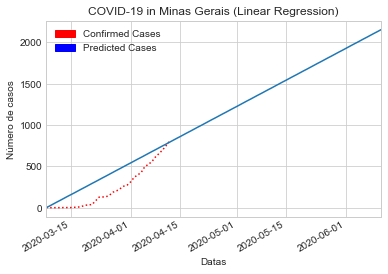

In [9]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 3.2 Polynomial Regression 2D

In [21]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

In [22]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

AttributeError: 'reversed' object has no attribute 'astype'

### 3.3 Polynomial Regression 3D

In [12]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

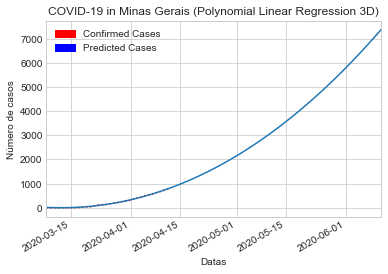

In [13]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 3D")

### 3.4 Polynomial Regression 4D

In [14]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

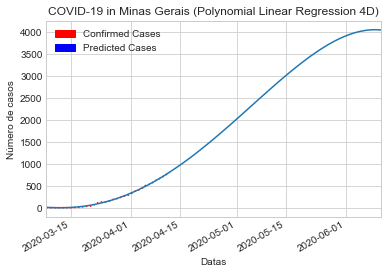

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 4D")

### 4.5 Logistic and Exponential Curve

In [16]:
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

In [17]:
def exponential_model(x, a, b, c):
    return a*np.exp(b*(x-c+10))

In [18]:
import datetime

dfForPlotMG = dfForPlotMG[dfForPlotMG['infectados'] > 0]
date_first_infection = dfForPlotMG['datas'].iloc[0]

dfForPlotMG.loc[:,'datas'] = dfForPlotMG['datas'].map(lambda x: (x - date_first_infection).days)
dfForPlotMG

,datas,infectados
8/3,0,1
9/3,1,1
10/3,2,1
11/3,3,1
12/3,4,1
13/3,5,2
14/3,6,2
15/3,7,2
16/3,8,5
17/3,9,7


Infection speed     = 5.917
Total infected      = 1066
40 dias =  2020-04-17 00:00:00


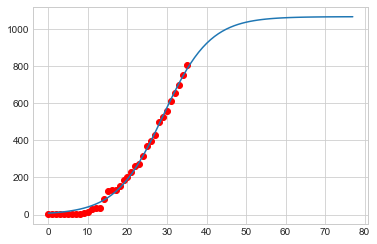

In [19]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

x = list(dfForPlotMG.iloc[:, 0])
y = list(dfForPlotMG.iloc[:, 1])
fit = curve_fit(logistic_model, x, y, maxfev=100000)

sol = int(fsolve(lambda x: logistic_model(x, fit[0][0], fit[0][1], fit[0][2]) - int(fit[0][2]), fit[0][1]))
end = date_first_infection + datetime.timedelta(days=sol)

pred_x = list(range(max(x), sol))
y_l=[logistic_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotMG.iloc[:, 0]), list(dfForPlotMG.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_l, label="Logistic model")

peakday = date_first_infection + datetime.timedelta(days=fit[0][1])
print("Infection speed     = %.3f" % fit[0][0])
print("Total infected      = %.0f" % fit[0][2])
print("40 dias = ", date_first_infection + datetime.timedelta(days=40))

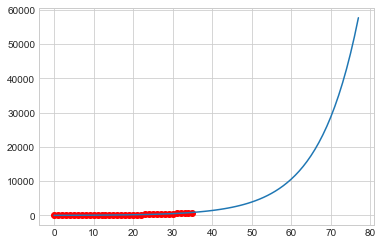

In [20]:
x = list(dfForPlotMG.iloc[:, 0])
y = list(dfForPlotMG.iloc[:, 1])
fit = curve_fit(exponential_model, x, y)

y_e = [exponential_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotMG.iloc[:, 0]), list(dfForPlotMG.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_e, label="Exponential model")